In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = "D:\data-files\Visadataset.csv"
visadf = pd.read_csv(path)

In [ ]:
cat = visadf.select_dtypes(include='object').columns
num = visadf.select_dtypes(exclude='object').columns

In [ ]:
cat

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [ ]:
num

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

In [ ]:
continent = visadf['continent'].value_counts()
case_status = visadf['case_status'].value_counts()

In [ ]:
continent,case_status

(continent
 Asia             16861
 Europe            3732
 North America     3292
 South America      852
 Africa             551
 Oceania            192
 Name: count, dtype: int64,
 case_status
 Certified    17018
 Denied        8462
 Name: count, dtype: int64)

- there are total 25480 applicants
- in that 25480 applicants 17018 applicants got visa
- 8462 applicants doesnt get visa
- also there are 16861 applicants applied for visa from asia
- we want to know how many applicants are applied from asia got certified
- and how many people from asia got denied

In [ ]:
cont_data = visadf['continent']
case_stat_data = visadf['case_status']
con1 = cont_data=='Asia'
con2 = case_stat_data =='Certified'
con = con1&con2
asia_cert = len(visadf[con])

In [ ]:
asia_cert

11012

In [ ]:
cont_data = visadf['continent']
case_stat_data = visadf['case_status']
label = visadf['continent'].unique()
for i in label:
    con1 = cont_data==i
    con2 = case_stat_data =='Certified'
    con = con1&con2
    print(len(visadf[con]))

11012
397
2037
2957
493
122


In [ ]:
cont_data = visadf['continent']
case_stat_data = visadf['case_status']
label = visadf['continent'].unique()
certi_count = []
denied_count = []
for i in label:
    con1 = cont_data==i
    con2 = case_stat_data =='Certified'
    con3 = case_stat_data =='Denied'
    cert_con = con1&con2
    denied_con = con1&con3
    certi_count.append(len(visadf[cert_con]))
    denied_count.append(len(visadf[denied_con]))
    

In [ ]:
pd.DataFrame(zip(certi_count,denied_count),index=label,columns=['Cerified','Denied'])

,Cerified,Denied
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


**cross tab**

In [ ]:
col1 = visadf['continent']
col2 = visadf['case_status']
df1 = pd.crosstab(index=col1,columns=col2)

<Axes: xlabel='continent'>

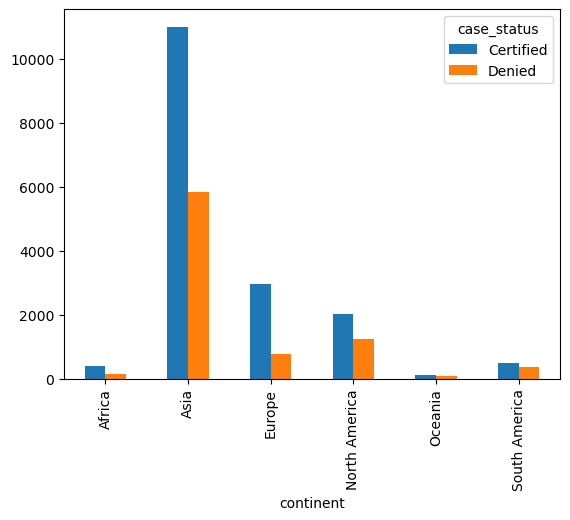

In [ ]:
df1.plot(kind='bar')

**case_status -  continent - education_of_employee**

In [ ]:
#ffrom asia there 16k applicants applied for visa
# in that 11k+ people got certified
# in that 11k+ people diff edu people avai
#we wnt those info

In [ ]:
col1 = visadf['continent']
col2 = visadf['education_of_employee']
col3 = visadf['case_status']
df2 = pd.crosstab(index = col1, columns = [col2,col3])
df2

education_of_employee Bachelor's        Doctorate        High School         \
case_status            Certified Denied Certified Denied   Certified Denied   
continent                                                                     
Africa                        81     62        43     11          23     43   
Asia                        4407   2761       780    143         676   1614   
Europe                      1040    259       788     58         162    328   
North America                641    584       207     51         210    191   
Oceania                       38     28        19      3          19     17   
South America                160    173        75     14          74     63   

education_of_employee  Master's         
case_status           Certified Denied  
continent                               
Africa                      250     38  
Asia                       5149   1331  
Europe                      967    130  
North America               979    429  
Oceania                      46     22  
South America               184    109

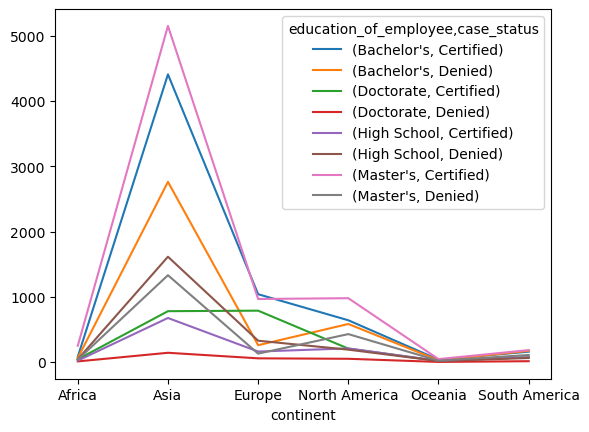

In [ ]:
df2.plot()
plt.show()

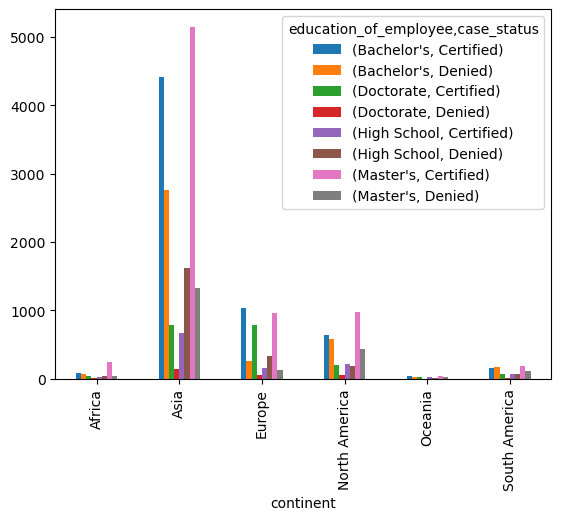

In [ ]:
df2.plot(kind='bar')
plt.show()

**groupby in pandas**

In [ ]:
visadf['education_of_employee'].value_counts()

education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64

In [ ]:
visadf['prevailing_wage']
#wages are numerical values 
#25480 applicants are avai
#

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

In [ ]:
list(visadf.groupby('education_of_employee'))

[("Bachelor's",
           case_id      continent education_of_employee has_job_experience  \
  2         EZYV03           Asia            Bachelor's                  N   
  3         EZYV04           Asia            Bachelor's                  N   
  6         EZYV07           Asia            Bachelor's                  N   
  7         EZYV08  North America            Bachelor's                  Y   
  8         EZYV09           Asia            Bachelor's                  N   
  ...          ...            ...                   ...                ...   
  25466  EZYV25467         Europe            Bachelor's                  Y   
  25468  EZYV25469           Asia            Bachelor's                  N   
  25473  EZYV25474           Asia            Bachelor's                  Y   
  25475  EZYV25476           Asia            Bachelor's                  Y   
  25479  EZYV25480           Asia            Bachelor's                  Y   
  
        requires_job_training  no_of_employee

In [ ]:
visadf.groupby('education_of_employee').count()

,case_id,continent,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
education_of_employee,,,,,,,,,,,
Bachelor's,10234,10234,10234,10234,10234,10234,10234,10234,10234,10234,10234
Doctorate,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192
High School,3420,3420,3420,3420,3420,3420,3420,3420,3420,3420,3420
Master's,9634,9634,9634,9634,9634,9634,9634,9634,9634,9634,9634


In [ ]:
visadf.groupby('education_of_employee').size()

education_of_employee
Bachelor's     10234
Doctorate       2192
High School     3420
Master's        9634
dtype: int64

In [ ]:
#based on grpby slct anthr col
visadf.groupby('education_of_employee')['prevailing_wage']

In [ ]:
visadf['prevailing_wage'].mean()
#mean wage of all the 25480 obser
# bach , doc, mast

np.float64(74455.81459209183)

In [ ]:
#we want only bachl wage mean 
visadf[visadf['education_of_employee']=="Bachelor's"]['prevailing_wage'].mean()

np.float64(73405.44373547)

In [ ]:
visadf.groupby('education_of_employee')['prevailing_wage'].mean()

education_of_employee
Bachelor's     73405.443735
Doctorate      64561.076657
High School    71582.147756
Master's       78843.057843
Name: prevailing_wage, dtype: float64

In [ ]:
con = visadf['case_status']=='Certified'
new_df = visadf[con]
new_df.groupby('continent').size()

continent
Africa             397
Asia             11012
Europe            2957
North America     2037
Oceania            122
South America      493
dtype: int64

In [ ]:
visadf['prevailing_wage'].min()
con = visadf['continent']=='Asia'
new_df = visadf[con]
new_df['prevailing_wage'].min()

3.3188

In [ ]:
visadf.groupby('continent')['prevailing_wage'].min()

continent
Africa           32.9286
Asia              3.3188
Europe            9.1753
North America     2.1367
Oceania          24.4888
South America     3.0031
Name: prevailing_wage, dtype: float64

- we have seen **continent and case status**
- we have seen three variable **continent and case status, education of employees**
- only cat column analysys complete
- only num col analysis complete
- bi variate multivariate analysis comp
- now we need to perform two numerical column analysis
    - this will give relation between two numerical column
    - also we need to perform scatter plot to visualize in nature 


In [ ]:
cat = visadf.select_dtypes(include='object').columns
num = visadf.select_dtypes(exclude='object').columns

**scatter plot**

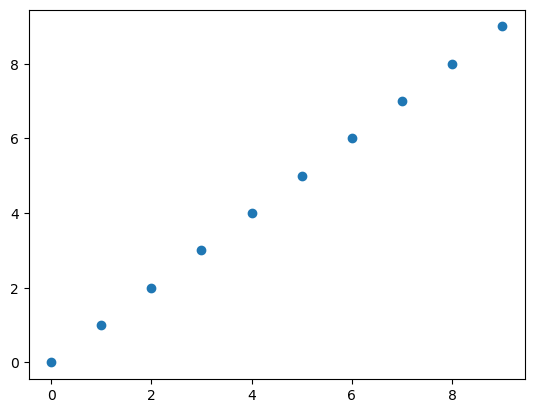

In [ ]:
x = range(0,10)
y = range(0,10)
plt.scatter(x,y)

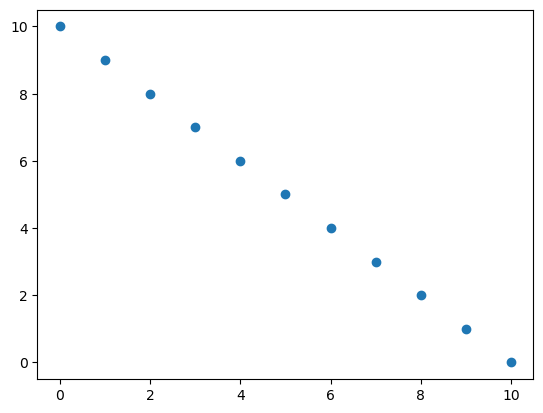

In [ ]:
x = range(0,11)
y = range(10,-1,-1)
plt.scatter(x,y)

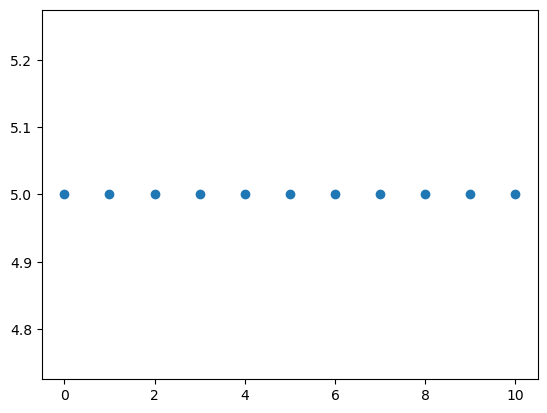

In [ ]:
x = [5 for i in range(0,11)]
plt.scatter(y,x)


In [ ]:
num

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

In [ ]:
visadf.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


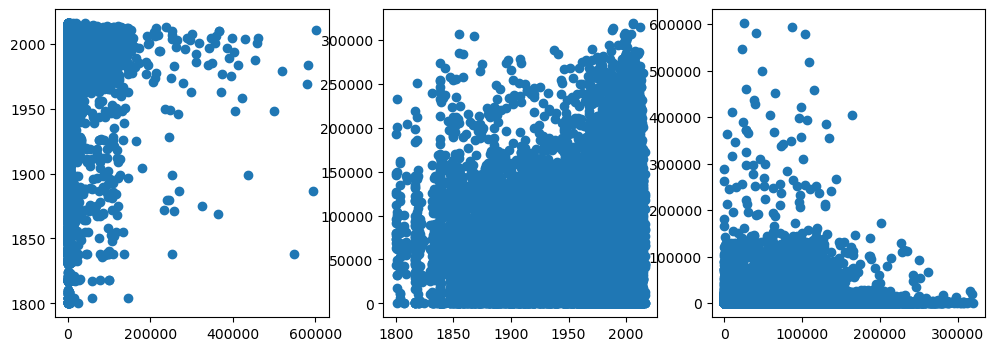

In [ ]:
empl = visadf['no_of_employees']
estab = visadf['yr_of_estab']
wage  = visadf['prevailing_wage']
plt.figure(figsize=(12,4))
plt.subplot(1,3,1).scatter(empl,estab)
plt.subplot(1,3,2).scatter(estab,wage)
plt.subplot(1,3,3).scatter(wage,empl)

In [ ]:
path =  r"D:\data-files\winequality_red.csv"
winedf = pd.read_csv(path)
winedf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
winedf_corr = winedf.corr(numeric_only=True)
winedf.corr(numeric_only=True).max()
winedf.corr(numeric_only=True).min()


fixed acidity          -0.682978
volatile acidity       -0.552496
citric acid            -0.552496
residual sugar         -0.085652
chlorides              -0.265026
free sulfur dioxide    -0.153794
total sulfur dioxide   -0.205654
density                -0.496180
pH                     -0.682978
sulphates              -0.260987
alcohol                -0.496180
quality                -0.390558
dtype: float64

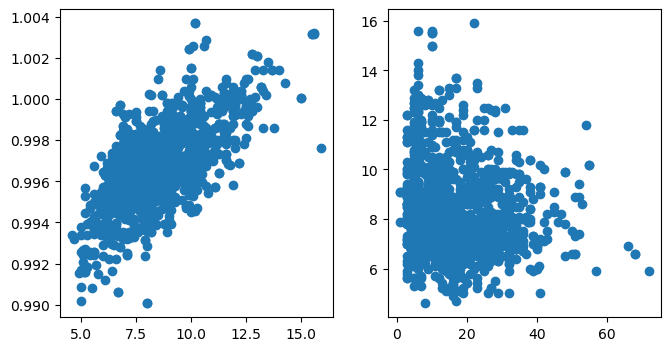

In [ ]:
fixed = winedf['fixed acidity']
density = winedf['density']
free_sulf = winedf['free sulfur dioxide']
plt.figure(figsize=(12,4))
plt.subplot(1,3,1).scatter(fixed,density)
plt.subplot(1,3,2).scatter(free_sulf,fixed)


**Heat map**

- any matrix we can visualize using heat map
- heat map will provide colors for different values
- heat map also provides color bar which indicated the color and its values
- For example the val ranges from 0.8 to 1 display as **blue color**
- so we no need to check values, we can directly see the blue color
- so immediately we can sense the blue color means highest value which is 0.8 to 1
- heat map available on seaborn plot

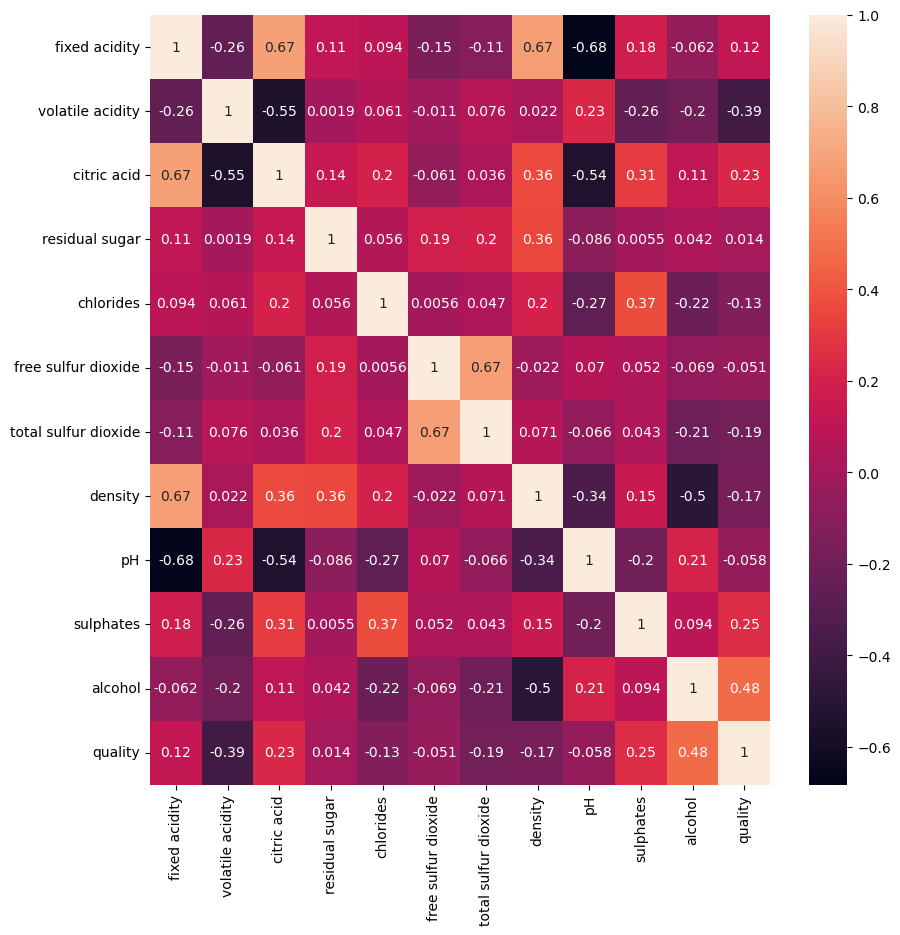

In [ ]:
winedata_corr = winedf.corr(numeric_only=True)
plt.figure(figsize=(10,10))
sns.heatmap(winedata_corr,annot=True)
plt.show()

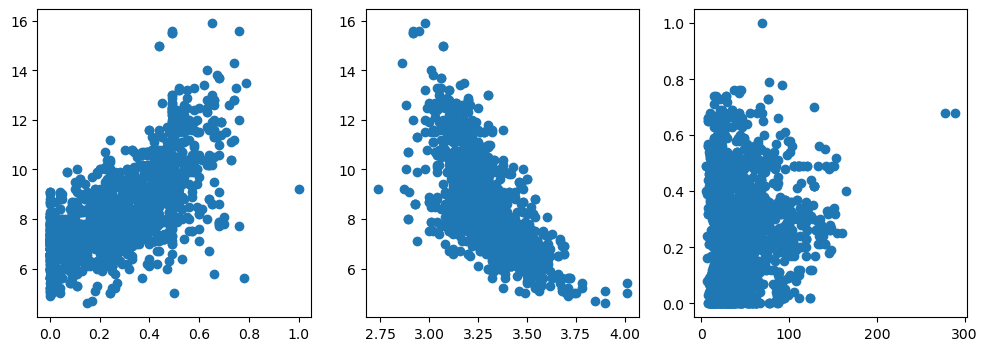

In [ ]:
#for ps rel
col1 = winedf['citric acid']
col2 = winedf['fixed acidity']
#neg rel
col3 = winedf['pH']
col4 = winedf['fixed acidity']
#no_rel
col5 = winedf['total sulfur dioxide']
col6 = winedf['citric acid']
plt.figure(figsize=(12,4))
plt.subplot(1,3,1).scatter(col1,col2)
plt.subplot(1,3,2).scatter(col3,col4)
plt.subplot(1,3,3).scatter(col5,col6)